In [1]:
import numpy as np
#import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import re
import torch
from torch.utils.data import Dataset, DataLoader
from torch import cuda
from tqdm import tqdm_notebook as tqdm
device = 'cuda' if cuda.is_available() else 'cpu'
# device = torch.device("cpu")
device

'cuda'

In [2]:
directory = "test_files"
df=[]

In [3]:
for filename in os.listdir(directory):
    if filename.endswith(".txt"):  # Process only text files
        file_path = os.path.join(directory, filename)
        
        # Read file content
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read().strip()  
        
        # Extract behavior ID without .txt
        behavior_id = filename.replace(".txt", "")  # Remove .txt
        emotion = re.sub(r"\d+", "", behavior_id)  # Remove digits
        
        # Store data in list
        df.append({"Emotions": emotion, "BehaviorId": behavior_id, "Actions": content})


In [4]:
import pandas as pd
data = pd.DataFrame(df)

In [5]:
data

,Emotions,BehaviorId,Actions
0,anger,anger012,"('move_head', '0', '14', '0', '80')\n('move_ar..."
1,interest,interest017,"('move_head', '0', '-20', '0', '80')\n('move_a..."
2,anger,anger046,"('drive_track', '36', '36', '1')\n('display_fa..."
3,confusion,confusion007,"('say_text', 'Moom?')\n('move_head', '0', '-20..."
4,joy,joy025,"('display_face', 'resources/misty_faces_black/..."
...,...,...,...
595,anger,anger034,"('move_head', '0', '7', '0', '80')\n('display_..."
596,disgust,disgust013,"('say_text', 'oOo')\n('display_face', 'resourc..."
597,anger,anger019,"('move_head', '0', '7', '0', '80')\n('move_arm..."
598,understanding,understanding032,"('display_face', 'resources/misty_faces_black/..."


In [6]:
#misty_data.to_csv("misty_data.csv", index=False)

In [7]:
def process_text(actions_str):
    pattern = r"\(([^)]+)\)"
    
    # Find all tuples in the string
    matches = re.findall(pattern, actions_str)
    
    result = []
    for match in matches:
        elements = [elem.strip() for elem in match.split(",")]
        action = elements[0].strip("'")  # Get the action name
        args = [arg.strip("'") if "'" in arg else arg for arg in elements[1:]]  # Process arguments
        action_str = "_".join([action] + args)
        
        # Special case: Handle 'display_face' and extract the correct components
        if action == 'display_face':
            # Extract the components from the file path
            path_parts = args[0].split('/')  # Split by '/'
            face_identifier = path_parts[-2]  
            image_number = path_parts[-1].replace('.png', '')  
            additional_param = args[1]  
            
            # Format as 'display_face_resources_misty_faces_black_10_1'
            action_str = f"display_face_resources_{face_identifier}_{image_number}_{additional_param}"
        
        result.append(action_str)
    
    # Join all the action strings with a space
    return " ".join(result)


In [8]:
data['Behaviors'] = data['Actions'].apply(process_text)

In [9]:
data

,Emotions,BehaviorId,Actions,Behaviors
0,anger,anger012,"('move_head', '0', '14', '0', '80')\n('move_ar...",move_head_0_14_0_80 move_arm_both_68_80 drive_...
1,interest,interest017,"('move_head', '0', '-20', '0', '80')\n('move_a...",move_head_0_-20_0_80 move_arm_both_51_80 drive...
2,anger,anger046,"('drive_track', '36', '36', '1')\n('display_fa...",drive_track_36_36_1 display_face_resources_mis...
3,confusion,confusion007,"('say_text', 'Moom?')\n('move_head', '0', '-20...",say_text_Moom? move_head_0_-20_0_80 display_fa...
4,joy,joy025,"('display_face', 'resources/misty_faces_black/...",display_face_resources_misty_faces_black_7_1 m...
...,...,...,...,...
595,anger,anger034,"('move_head', '0', '7', '0', '80')\n('display_...",move_head_0_7_0_80 display_face_resources_mist...
596,disgust,disgust013,"('say_text', 'oOo')\n('display_face', 'resourc...",say_text_oOo display_face_resources_misty_face...
597,anger,anger019,"('move_head', '0', '7', '0', '80')\n('move_arm...",move_head_0_7_0_80 move_arm_both_85_80 drive_t...
598,understanding,understanding032,"('display_face', 'resources/misty_faces_black/...",display_face_resources_misty_faces_black_10_1 ...


In [10]:
data["Actions"][0:5]

0    ('move_head', '0', '14', '0', '80')\n('move_ar...
1    ('move_head', '0', '-20', '0', '80')\n('move_a...
2    ('drive_track', '36', '36', '1')\n('display_fa...
3    ('say_text', 'Moom?')\n('move_head', '0', '-20...
4    ('display_face', 'resources/misty_faces_black/...
Name: Actions, dtype: object

In [11]:
print("Before Processing the functions::",data["Actions"][0])
print("After processing::",data["Behaviors"][0])

Before Processing the functions:: ('move_head', '0', '14', '0', '80')
('move_arm', 'both', '68', '80')
('drive_track', '36', '36', '1')
('display_face', 'resources/misty_faces_black/1.png', '1')
('say_text', 'Hurrr!')
('drive_track', '0', '0', '1')
('drive_track', '36', '36', '1')
('display_face', 'resources/misty_faces_black/1.png', '1')
('say_text', 'Hurr!')
('move_head', '0', '0', '0', '80')
('move_arm', 'both', '0', '80')
('display_face', 'resources/misty_faces_black/1.png', '1')
After processing:: move_head_0_14_0_80 move_arm_both_68_80 drive_track_36_36_1 display_face_resources_misty_faces_black_1_1 say_text_Hurrr! drive_track_0_0_1 drive_track_36_36_1 display_face_resources_misty_faces_black_1_1 say_text_Hurr! move_head_0_0_0_80 move_arm_both_0_80 display_face_resources_misty_faces_black_1_1


In [12]:
# Count the occurrences of each emotion label
emotion_counts = data['Emotions'].value_counts()
print("Emotion label distribution:\n", emotion_counts)


Emotion label distribution:
 Emotions
fear             110
joy               82
confusion         80
interest          77
anger             73
understanding     57
surprise          25
sorrow            23
disgust           23
boredom           21
frustration       12
relief            11
hope               2
gratitude          2
alarm              1
desire             1
Name: count, dtype: int64


In [13]:
emotion_groups = {
    "anger": "anger_frustration",
    "frustration": "anger_frustration",
    "confusion": "confusion_sorrow_boredom",
    "sorrow": "confusion_sorrow_boredom",
    "boredom": "confusion_sorrow_boredom",
    "disgust": "disgust_surprise_alarm_fear",
    "surprise": "disgust_surprise_alarm_fear",
    "alarm": "disgust_surprise_alarm_fear",
    "fear": "disgust_surprise_alarm_fear",
    "interest": "interest_desire",
    "desire": "interest_desire",
    "joy": "joy_hope",
    "hope": "joy_hope",
    "understanding": "understanding_gratitude_relief",
    "gratitude": "understanding_gratitude_relief",
    "relief": "understanding_gratitude_relief"
}

In [14]:
data["Emotions"] = data["BehaviorId"].apply(lambda x: re.sub(r"\d+", "", str(x).strip()))
data["Emotions"] = data["Emotions"].apply(lambda x: emotion_groups.get(x, x))
data

,Emotions,BehaviorId,Actions,Behaviors
0,anger_frustration,anger012,"('move_head', '0', '14', '0', '80')\n('move_ar...",move_head_0_14_0_80 move_arm_both_68_80 drive_...
1,interest_desire,interest017,"('move_head', '0', '-20', '0', '80')\n('move_a...",move_head_0_-20_0_80 move_arm_both_51_80 drive...
2,anger_frustration,anger046,"('drive_track', '36', '36', '1')\n('display_fa...",drive_track_36_36_1 display_face_resources_mis...
3,confusion_sorrow_boredom,confusion007,"('say_text', 'Moom?')\n('move_head', '0', '-20...",say_text_Moom? move_head_0_-20_0_80 display_fa...
4,joy_hope,joy025,"('display_face', 'resources/misty_faces_black/...",display_face_resources_misty_faces_black_7_1 m...
...,...,...,...,...
595,anger_frustration,anger034,"('move_head', '0', '7', '0', '80')\n('display_...",move_head_0_7_0_80 display_face_resources_mist...
596,disgust_surprise_alarm_fear,disgust013,"('say_text', 'oOo')\n('display_face', 'resourc...",say_text_oOo display_face_resources_misty_face...
597,anger_frustration,anger019,"('move_head', '0', '7', '0', '80')\n('move_arm...",move_head_0_7_0_80 move_arm_both_85_80 drive_t...
598,understanding_gratitude_relief,understanding032,"('display_face', 'resources/misty_faces_black/...",display_face_resources_misty_faces_black_10_1 ...


In [16]:
# Count the occurrences of each emotion label
emotion_counts = data['Emotions'].value_counts()
print("Emotion label distribution:\n", emotion_counts)


Emotion label distribution:
 Emotions
disgust_surprise_alarm_fear       159
confusion_sorrow_boredom          124
anger_frustration                  85
joy_hope                           84
interest_desire                    78
understanding_gratitude_relief     70
Name: count, dtype: int64


In [17]:
print(data['Behaviors'].iloc[0])

move_head_0_14_0_80 move_arm_both_68_80 drive_track_36_36_1 display_face_resources_misty_faces_black_1_1 say_text_Hurrr! drive_track_0_0_1 drive_track_36_36_1 display_face_resources_misty_faces_black_1_1 say_text_Hurr! move_head_0_0_0_80 move_arm_both_0_80 display_face_resources_misty_faces_black_1_1


In [18]:
num_class=len(data['Emotions'].unique())
print("Total number of emotions labels :",num_class)
# Preparing the text and labels
texts = data['Behaviors'].tolist()
labels = data['Emotions'].tolist()
X_train, X_test_dev, y_train, y_test_dev = train_test_split(texts, labels, stratify = labels, test_size=0.2, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test_dev, y_test_dev,stratify = y_test_dev, test_size=0.5, random_state=42)
NUM_OUT= num_class

Total number of emotions labels : 6


In [19]:
labels

['anger_frustration',
 'interest_desire',
 'anger_frustration',
 'confusion_sorrow_boredom',
 'joy_hope',
 'joy_hope',
 'understanding_gratitude_relief',
 'disgust_surprise_alarm_fear',
 'confusion_sorrow_boredom',
 'anger_frustration',
 'understanding_gratitude_relief',
 'anger_frustration',
 'joy_hope',
 'disgust_surprise_alarm_fear',
 'interest_desire',
 'interest_desire',
 'interest_desire',
 'confusion_sorrow_boredom',
 'anger_frustration',
 'joy_hope',
 'confusion_sorrow_boredom',
 'joy_hope',
 'confusion_sorrow_boredom',
 'disgust_surprise_alarm_fear',
 'anger_frustration',
 'joy_hope',
 'interest_desire',
 'anger_frustration',
 'anger_frustration',
 'understanding_gratitude_relief',
 'understanding_gratitude_relief',
 'disgust_surprise_alarm_fear',
 'anger_frustration',
 'disgust_surprise_alarm_fear',
 'anger_frustration',
 'interest_desire',
 'interest_desire',
 'interest_desire',
 'disgust_surprise_alarm_fear',
 'confusion_sorrow_boredom',
 'interest_desire',
 'anger_frustrat

In [20]:
from transformers import RobertaTokenizer, RobertaModel,RobertaPreTrainedModel, get_linear_schedule_with_warmup
class EMRODataset(torch.utils.data.Dataset):
    def __init__(self, text, labels, tokenizer, max_len):
        self.behaviors = [self.preprocess_text(t) for t in text]
        
        self.labels = labels  # Emotion labels as indices
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.behaviors)

    def __getitem__(self, idx):
        behavior = self.behaviors[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(
            behavior,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
        'input_ids': inputs['input_ids'].squeeze(0),  # Shape: [seq_length]
        'attention_mask': inputs['attention_mask'].squeeze(0),  # Shape: [seq_length]
        'targets': torch.tensor(label, dtype=torch.long)  # integer Emotion label as tensor
    }
        
    def preprocess_text(self,text):
      text = text.replace("-", " "). replace("_", " ")
      return text

In [21]:
from transformers import RobertaTokenizer, RobertaModel, get_linear_schedule_with_warmup

class RobertaClass(torch.nn.Module):
    def __init__(self, num_classes):
        super(RobertaClass, self).__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        self.dropout = torch.nn.Dropout(0.3) 
        self.classifier = torch.nn.Linear(self.roberta.config.hidden_size, num_classes)
        self.loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        pooled_output = torch.mean(outputs.last_hidden_state, dim=1) 
        #pooled_output = outputs.last_hidden_state[:, 0] 
        self.activation = torch.nn.ReLU()
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        
        if labels is not None:
            loss = self.loss_fn(logits, labels)
            return loss, logits  # Return loss and logits for training
        else:
            return logits

In [23]:
emotions = data['Emotions'].unique()
emotion_to_label = {emotion: idx for idx, emotion in enumerate(emotions)}
label_to_emotion = {idx: emotion for emotion, idx in emotion_to_label.items()}
emro_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [24]:
max_len = 256
train_batch_size = 16
valid_batch_size = 32
emro_train_dataset = EMRODataset(X_train, [emotion_to_label[e] for e in y_train], emro_tokenizer, max_len)
emro_val_dataset = EMRODataset(X_dev, [emotion_to_label[e] for e in y_dev], emro_tokenizer, max_len)
emro_train_loader = DataLoader(emro_train_dataset, batch_size=train_batch_size, shuffle=True)
emro_val_loader = DataLoader(emro_val_dataset, batch_size=valid_batch_size, shuffle=False)


In [25]:
misty_emro = RobertaClass(NUM_OUT)
misty_emro.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [26]:
def train_emro_model(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0.0
    for batch in tqdm(dataloader, desc="Training EMRO"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['targets'].to(device)

        optimizer.zero_grad()
        loss, logits = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping

        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    average_loss = total_loss / len(dataloader)
    return average_loss

In [27]:
def evaluate_emro_model(model, dataloader, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating EMRO"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['targets'].to(device)  # Ensure 'targets' contains correct labels

            loss, logits = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            total_loss += loss.item()

            predictions = torch.argmax(logits, dim=1)

            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Store labels for confusion matrix
            true_labels.extend(labels.cpu().numpy()) 
            pred_labels.extend(predictions.cpu().numpy())

    accuracy = correct / total
    average_loss = total_loss / len(dataloader)
    
    return average_loss, accuracy, true_labels, pred_labels


In [29]:
# Optimizer for EMRO
from transformers import get_linear_schedule_with_warmup
# Number of epochs
emro_epochs = 12
emro_optimizer = torch.optim.AdamW(misty_emro.parameters(), lr=2e-5, weight_decay=1e-4)
scheduler = get_linear_schedule_with_warmup(
    emro_optimizer,
    num_warmup_steps=0, 
    num_training_steps=len(emro_train_loader) * emro_epochs
)

best_val_loss = float('inf')
patience = 3  # Number of epochs to wait before stopping
counter = 0


In [30]:
from tqdm import tqdm 
for epoch in range(emro_epochs):
    print(f"EMRO Epoch {epoch + 1}/{emro_epochs}")
    train_loss = train_emro_model(misty_emro, emro_train_loader, emro_optimizer, device)
    val_loss, val_accuracy,_,_ = evaluate_emro_model(misty_emro, emro_val_loader, device)
    print(f"EMRO Training Loss: {train_loss:.4f}")
    print(f"EMRO Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        # Save the model
        torch.save(misty_emro.state_dict(), 'misty_emro.pt')
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break


EMRO Epoch 1/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


EMRO Training Loss: 1.7942
EMRO Validation Loss: 1.7302, Accuracy: 0.3167
EMRO Epoch 2/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


EMRO Training Loss: 1.6879
EMRO Validation Loss: 1.5530, Accuracy: 0.3667
EMRO Epoch 3/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


EMRO Training Loss: 1.2961
EMRO Validation Loss: 0.9499, Accuracy: 0.8000
EMRO Epoch 4/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


EMRO Training Loss: 0.9094
EMRO Validation Loss: 0.7402, Accuracy: 0.8500
EMRO Epoch 5/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


EMRO Training Loss: 0.7368
EMRO Validation Loss: 0.7242, Accuracy: 0.8500
EMRO Epoch 6/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


EMRO Training Loss: 0.6235
EMRO Validation Loss: 0.6975, Accuracy: 0.8500
EMRO Epoch 7/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


EMRO Training Loss: 0.5767
EMRO Validation Loss: 0.6984, Accuracy: 0.8667
EMRO Epoch 8/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


EMRO Training Loss: 0.5552
EMRO Validation Loss: 0.6913, Accuracy: 0.8500
EMRO Epoch 9/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


EMRO Training Loss: 0.5266
EMRO Validation Loss: 0.6968, Accuracy: 0.8667
EMRO Epoch 10/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


EMRO Training Loss: 0.4999
EMRO Validation Loss: 0.6867, Accuracy: 0.9000
EMRO Epoch 11/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


EMRO Training Loss: 0.4972
EMRO Validation Loss: 0.6618, Accuracy: 0.8833
EMRO Epoch 12/12


Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


EMRO Training Loss: 0.4894
EMRO Validation Loss: 0.6603, Accuracy: 0.8833


In [29]:
#emro_model.load_state_dict(torch.load('misty_emro.pt'))
#emro_model.to(device)
#emro_model.eval()

In [31]:
# After training is complete
from sklearn.metrics import precision_recall_fscore_support
emro_test_dataset = EMRODataset(X_test, [emotion_to_label[e] for e in y_test], emro_tokenizer, max_len)
emro_test_loader = DataLoader(emro_test_dataset, batch_size=valid_batch_size, shuffle=False)
test_loss, test_accuracy,true_labels, pred_labels  = evaluate_emro_model(misty_emro, emro_test_loader, device)
print(f"EMRO Test Loss for misty: {test_loss:.4f}, EMRO Accuracy for Misty : {test_accuracy:.4f}")
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
#print("True Emotions:", true)

Evaluating EMRO: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

EMRO Test Loss for misty: 0.8379, EMRO Accuracy for Misty : 0.8167
Precision: 0.8234, Recall: 0.8167, F1-score: 0.8163


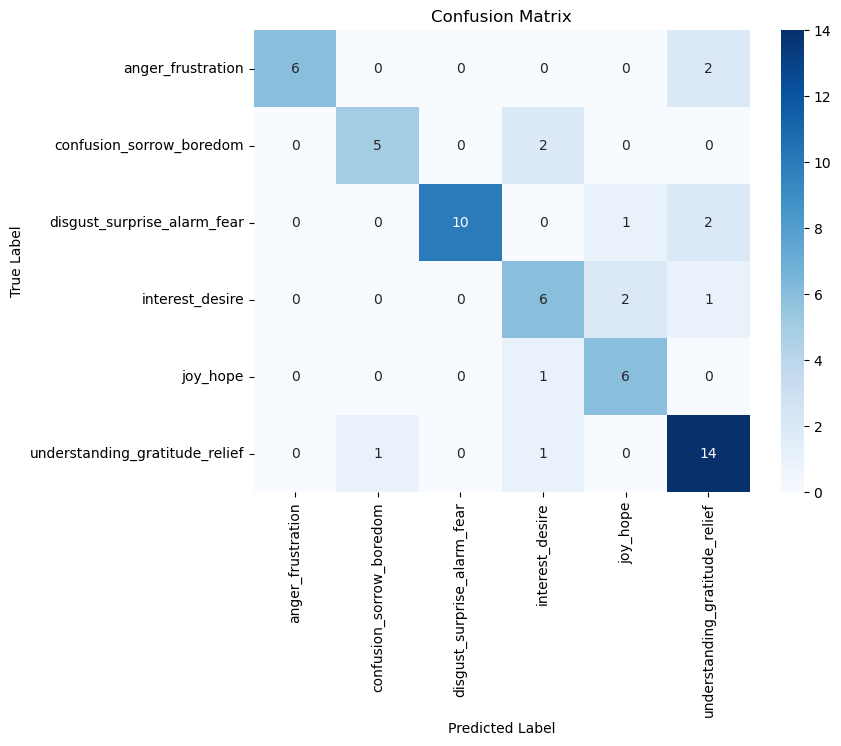

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Extract unique emotion labels in sorted order
emotion_classes = sorted(data['Emotions'].unique())  
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



**For GRED Model**

In [36]:
import gc
torch.cuda.empty_cache()
#del model
gc.collect()

1537

In [37]:
class GREDDataset(Dataset):
    def __init__(self, emotions, behaviors, tokenizer, max_len, emotion_to_label):
        self.emotions = emotions
        self.behaviors = behaviors
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.emotion_to_label = emotion_to_label

    def __len__(self):
        return len(self.emotions)

    def __getitem__(self, idx):
        emotion = self.emotions[idx]
        behavior = self.behaviors[idx]

        # Create the prompt
        prompt = f"<|startoftext|>Emotion: {emotion} <|endoftext|> Behaviors:"
        target = f"{behavior} <|endoftext|>"
        full_input = prompt + " " + target
        
        # Tokenize the full input
        inputs = self.tokenizer(
            full_input,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = inputs['input_ids'].squeeze()  # Shape: (seq_len,)
        attention_mask = inputs['attention_mask'].squeeze()
        
        labels = input_ids.clone()
        labels[:len(self.tokenizer(prompt)['input_ids'])] = -100 
        emotion_label = torch.tensor(self.emotion_to_label[emotion], dtype=torch.long)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels,
            'emotion_label': emotion_label  # Integer emotion label
        }

In [38]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

gred_tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2-medium")
gred_model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-medium")

In [39]:
# Add a padding token and resize token embeddings
special_tokens_dict = {'additional_special_tokens': ['<|startoftext|>', '<|endoftext|>']}
gred_tokenizer.add_special_tokens(special_tokens_dict)
if gred_tokenizer.pad_token is None:
    gred_tokenizer.add_special_tokens({'pad_token': '[PAD]'})

gred_model.resize_token_embeddings(len(gred_tokenizer))
gred_model.to(device)

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50259, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=3072, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=1024)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=4096, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50259, bias=False)
)

In [40]:
def train_gred(gred_model, dataloader, optimizer, device):
    gred_model.train()
    total_loss = 0.0
    for batch in dataloader:
        # Move data to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        emotion_labels = batch['emotion_label'].to(device)  # Original emotion label for GRED
        # Reset gradients
        optimizer.zero_grad()
        outputs = gred_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        # Track total loss
        total_loss += loss.item()

    average_loss = total_loss / len(dataloader)
    return average_loss


In [41]:
def evaluate_gred(gred_model, dataloader, device):
    gred_model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for batch in dataloader:
            # Move data to device
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            emotion_labels = batch['emotion_label'].to(device)
            outputs = gred_model(input_ids, attention_mask=attention_mask, labels = labels)
            loss = outputs.loss
            total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    return average_loss

In [42]:
batch_size =8
gred_train_dataset = GREDDataset(y_train, X_train, gred_tokenizer, max_len, emotion_to_label)
gred_val_dataset = GREDDataset(y_dev, X_dev, gred_tokenizer, max_len, emotion_to_label)
gred_test_dataset = GREDDataset(y_test, X_test, gred_tokenizer, max_len, emotion_to_label)


gred_train_loader = DataLoader(gred_train_dataset, batch_size=batch_size, shuffle=True)
gred_val_loader = DataLoader(gred_val_dataset, batch_size=batch_size, shuffle=False)
gred_test_loader = DataLoader(gred_test_dataset, batch_size=batch_size, shuffle=False)


In [42]:
gred_optimizer = torch.optim.AdamW(gred_model.parameters(), lr=2e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [43]:
best_val_loss = float('inf')
patience = 2  # Number of epochs to wait before stopping
counter = 0
EPOCHS = 18
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    
    # Training Phase
    train_loss = train_gred(
        gred_model, gred_train_loader, gred_optimizer, device
    )
    print(f"Training Loss: {train_loss:.4f} ")
    
    val_loss= evaluate_gred(
        gred_model, gred_val_loader, device
    )
    print(f"Validation Loss: {val_loss:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        # Save the model  
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break


Epoch 1/18
Training Loss: 3.3038 
Validation Loss: 1.8647

Epoch 2/18
Training Loss: 1.8446 
Validation Loss: 0.8320

Epoch 3/18
Training Loss: 0.5958 
Validation Loss: 0.3135

Epoch 4/18
Training Loss: 0.3045 
Validation Loss: 0.2919

Epoch 5/18
Training Loss: 0.2804 
Validation Loss: 0.2840

Epoch 6/18
Training Loss: 0.2658 
Validation Loss: 0.2751

Epoch 7/18
Training Loss: 0.2553 
Validation Loss: 0.2691

Epoch 8/18
Training Loss: 0.2445 
Validation Loss: 0.2633

Epoch 9/18
Training Loss: 0.2395 
Validation Loss: 0.2626

Epoch 10/18
Training Loss: 0.2275 
Validation Loss: 0.2617

Epoch 11/18
Training Loss: 0.2207 
Validation Loss: 0.2590

Epoch 12/18
Training Loss: 0.2165 
Validation Loss: 0.2590

Epoch 13/18
Training Loss: 0.2127 
Validation Loss: 0.2572

Epoch 14/18
Training Loss: 0.2057 
Validation Loss: 0.2548

Epoch 15/18
Training Loss: 0.1966 
Validation Loss: 0.2589

Epoch 16/18
Training Loss: 0.1926 
Validation Loss: 0.2628
Early stopping triggered


In [44]:
#torch.save(gred_model.state_dict(), 'misty_gred.pt')

In [45]:
def create_prompt(emotion):
    prompt = f"<|startoftext|>Emotion: {emotion} <|endoftext|> Behaviors:"
    return prompt

In [46]:
def generate_behavior(gred_model, gred_tokenizer, emotion, num_samples=2, max_length=256):
    behaviors = []
    gred_model.eval()
    prompt = create_prompt(emotion)

    input_ids = gred_tokenizer.encode(
        prompt, 
        return_tensors='pt', 
        max_length=max_length, 
        truncation=True
    ).to(device)
    
    for _ in range(num_samples):
        with torch.no_grad():
            output_sequences = gred_model.generate(
                input_ids=input_ids,
                max_length=max_length,
                num_return_sequences=1,
                do_sample=True,
                top_k=50,
                top_p=0.95,
                temperature=0.7,
                pad_token_id=gred_tokenizer.pad_token_id
            )
        generated_text = gred_tokenizer.decode(output_sequences[0], skip_special_tokens=True)
        #print("generated text is ", generated_text)
        # Remove the prompt from the generated text
        behavior = generated_text.split(":")[-1].strip()
        behaviors.append(behavior)
    
    return behaviors

In [47]:
# Generate behaviors for each emotion
def generate_behaviors_for_emotions(gred_model, gred_tokenizer, emotions, num_samples=20, num_runs=10):
    all_generated_behaviors = []
    emotions_list = []
    behaviors_list = []

    for _ in range(num_runs):  # Repeat the process for 5 runs
        for emotion in emotions:
            generated_behaviors = generate_behavior(
                gred_model=gred_model,
                gred_tokenizer=gred_tokenizer,
                emotion=emotion,
                num_samples=num_samples
            )

            for behavior in generated_behaviors:
                emotions_list.append(emotion)
                behaviors_list.append(behavior)
                #print(f"{emotion}: {behavior}")
                all_generated_behaviors.append((emotion, behavior))

    return all_generated_behaviors, emotions_list, behaviors_list

In [48]:
all_generated_behaviors, emotions_list, behaviors_list = generate_behaviors_for_emotions(
    gred_model=gred_model,
    gred_tokenizer=gred_tokenizer,
    emotions=emotions,
    num_samples=20,  # Behaviors per run
    num_runs=5  # Total runs
)

In [50]:
#misty_gred_data = pd.DataFrame({"Emotion": emotions_list, "Behavior": behaviors_list})
#misty_gred_data.to_csv("misty_gred_data.csv", index=False)

In [43]:
test_dataset = EMRODataset(behaviors_list, [emotion_to_label[e] for e in emotions_list], emro_tokenizer, max_len)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# After training is complete
test_loss, test_accuracy,true_labels, pred_labels= evaluate_emro_model(misty_emro, test_loader, device)
print(f"EMRO Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Evaluating EMRO: 100%|██████████| 75/75 [00:05<00:00, 14.93it/s]

EMRO Test Loss: 0.6767, Accuracy: 0.8900
Precision: 0.8933, Recall: 0.8900, F1-score: 0.8903


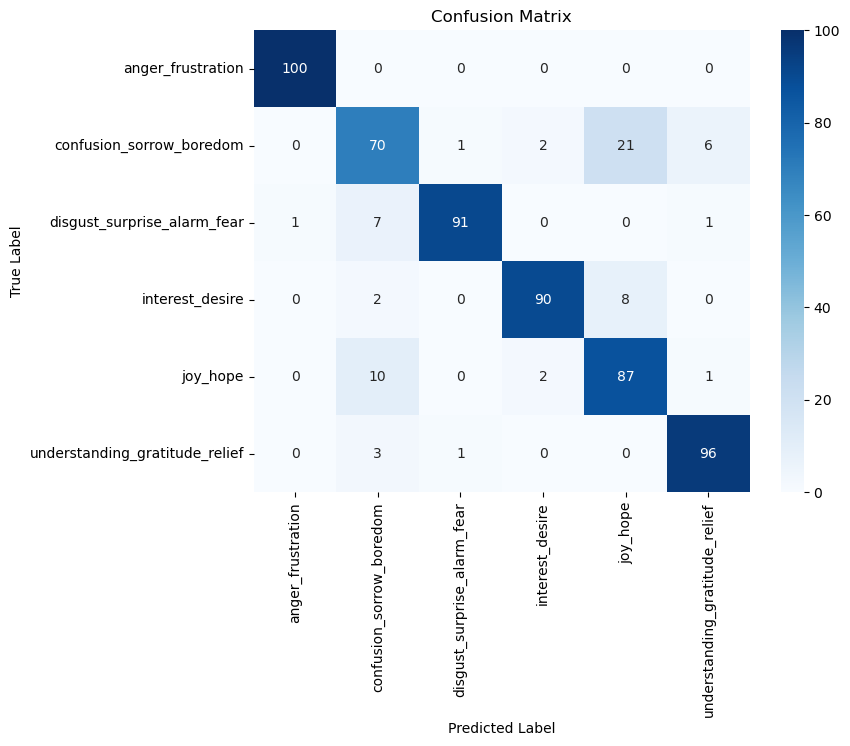

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Extract unique emotion labels in sorted order
emotion_classes = sorted(data['Emotions'].unique())  
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [45]:
class EmbeddingsExtractor(torch.nn.Module):
    def __init__(self, emro_model, tokenizer, device):
        super().__init__()
        self.emro_model = emro_model
        self.tokenizer = tokenizer
        self.device = device
        for param in self.emro_model.parameters():
            param.requires_grad = False
        self.emro_model.eval()

    def get_embedding(self, text):
        if isinstance(text, str):
            text = [text]
        inputs = self.tokenizer(
            text, return_tensors='pt',  max_length=128, truncation=True, padding=True
        ).to(self.device)
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']
        outputs = self.emro_model.roberta(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        # Usually take the [CLS] token (first token) as the pooled embedding
        pooled_output = last_hidden_state[:, 0, :]
    
        return pooled_output

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def compute_cosine_similarity_for_emotion(embeddings, emotion_labels, emotion):
    # Extract indices of behaviors with the given emotion
    emotion_indices = [i for i, label in enumerate(emotion_labels) if label == emotion]
    emotion_embeddings = [embeddings[i] for i in emotion_indices]  # Extract embeddings for this emotion

    emotion_embeddings_cpu = [embedding.cpu().numpy() for embedding in emotion_embeddings]
    # Compute the cosine similarity matrix for the emotion embeddings
    cosine_sim_matrix = cosine_similarity(emotion_embeddings_cpu)
    
    # Get the upper triangular indices to compute pairwise similarity for unique pairs
    upper_triangular_indices = np.triu_indices(len(emotion_embeddings_cpu), k=1)
    similarity_values = cosine_sim_matrix[upper_triangular_indices]

    # Calculate the average cosine similarity
    avg_cosine_similarity = np.mean(similarity_values) if similarity_values.size > 0 else 1.0

    return avg_cosine_similarity

# Calculate novelty for each emotion
def compute_average_novelty_by_emotion(embeddings, emotion_labels):
    avg_novelty_by_emotion = {}
    
    # Loop through each emotion and compute average cosine similarity and novelty
    emotions = set(emotion_labels)  # Get unique emotions
    for emotion in emotions:
        avg_cosine_similarity = compute_cosine_similarity_for_emotion(embeddings, emotion_labels, emotion)
        #novelty_scores = torch.stack([torch.exp(-cs) for cs in avg_cosine_sims])
        avg_novelty_score = 1 - avg_cosine_similarity  # Novelty is inversely related to similarity
        avg_novelty_by_emotion[emotion] = np.float32(avg_novelty_score)  # Store novelty as float32
    
    return avg_novelty_by_emotion

def evaluate_novelty(all_generated_behaviors, embeddings_extractor):
    behaviors = [behavior for _, behavior in all_generated_behaviors]
    emotion_labels = [emotion for emotion, _ in all_generated_behaviors]

    # Extract embeddings for all behaviors using the embeddings extractor
    behavior_embeddings = embeddings_extractor.get_embedding(behaviors)

    # Compute average novelty score by emotion
    avg_novelty_by_emotion = compute_average_novelty_by_emotion(behavior_embeddings, emotion_labels)

    # Print or return the novelty scores
    print("Novelty Scores for each emotions")
    for emotion, novelty_score in avg_novelty_by_emotion.items():
        print(f"{emotion}:: {novelty_score}")

    return avg_novelty_by_emotion


In [48]:
embeddings_extractor = EmbeddingsExtractor(misty_emro, emro_tokenizer, device)
avg_novelty_by_emotion = evaluate_novelty(all_generated_behaviors, embeddings_extractor)

Novelty Scores for each emotions
confusion_sorrow_boredom:: 0.10547524690628052
interest_desire:: 0.08228397369384766
understanding_gratitude_relief:: 0.08751171827316284
disgust_surprise_alarm_fear:: 0.08151477575302124
anger_frustration:: 0.050930678844451904
joy_hope:: 0.07132023572921753
